In [1]:

import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#pip install numpy --upgrade


In [3]:
#pip install numpy==1.21.6

In [4]:
#pip install tensorflow-metal==0.6.0

In [5]:
#pip install tensorflow==2.12.0

In [6]:

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/DELL/Desktop/data",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [9]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [10]:
len(dataset)

131

In [36]:


pip install pillow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    
    class_counts = {}  # Dictionary to store class counts
    
 
    
    return train_ds, val_ds, test_ds 

In [16]:
train_ds,val_ds,test_ds  = get_dataset(dataset)

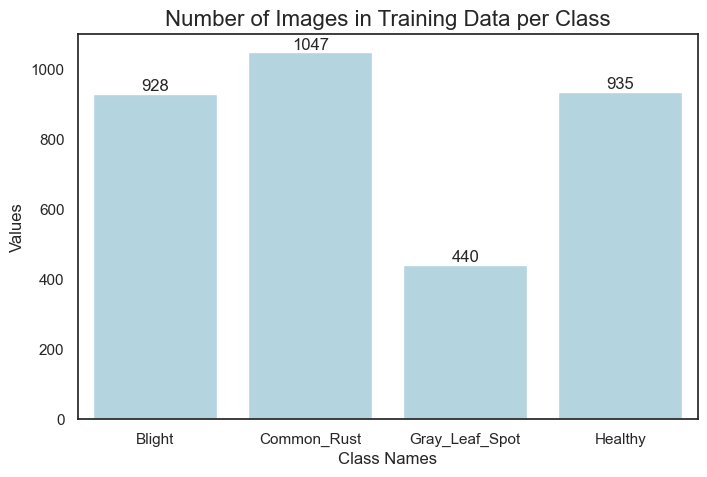

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
values = [928, 1047, 440, 935]
labels = class_names  # Labels for each bar (you can customize these)

# Create a bar graph using Seaborn
sns.set(style="white")  # Use "white" style without grid lines
plt.figure(figsize=(8, 5))  # Set the figure size

# Choose a single color for all bars
bar_color = 'lightblue'  # You can specify any color here

# Create the bar graph with a single color
sns.barplot(x=labels, y=values, color=bar_color)

# Add numeric values at the top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add labels and a title
plt.xlabel('Class Names')
plt.ylabel('Values')
plt.title('Number of Images in Training Data per Class', fontsize=16)

# Display the graph
plt.show()

In [18]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 104

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(255,255),
layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building

In [22]:
n_classes = 4
input_shape = (BATCH_SIZE,255,255,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [25]:
history = model.fit(
train_ds,
epochs=30,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/30
104/104 [==============================] - 402s 4s/step - loss: 0.7818 - accuracy: 0.6495 - val_loss: 0.4043 - val_accuracy: 0.8125
Epoch 2/30
104/104 [==============================] - 345s 3s/step - loss: 0.4579 - accuracy: 0.8228 - val_loss: 0.3679 - val_accuracy: 0.8389
Epoch 3/30
104/104 [==============================] - 327s 3s/step - loss: 0.3904 - accuracy: 0.8366 - val_loss: 0.3208 - val_accuracy: 0.8558
Epoch 4/30
104/104 [==============================] - 318s 3s/step - loss: 0.3641 - accuracy: 0.8502 - val_loss: 0.3617 - val_accuracy: 0.8341
Epoch 5/30
104/104 [==============================] - 318s 3s/step - loss: 0.3372 - accuracy: 0.8589 - val_loss: 0.2979 - val_accuracy: 0.8726
Epoch 6/30
104/104 [==============================] - 323s 3s/step - loss: 0.3245 - accuracy: 0.8670 - val_loss: 0.2819 - val_accuracy: 0.8870
Epoch 7/30
104/104 [==============================] - 328s 3s/step - loss: 0.3144 - accuracy: 0.8676 - val_loss: 0.2927 - val_accuracy: 0.8606

In [26]:
model.save('model.h5')

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


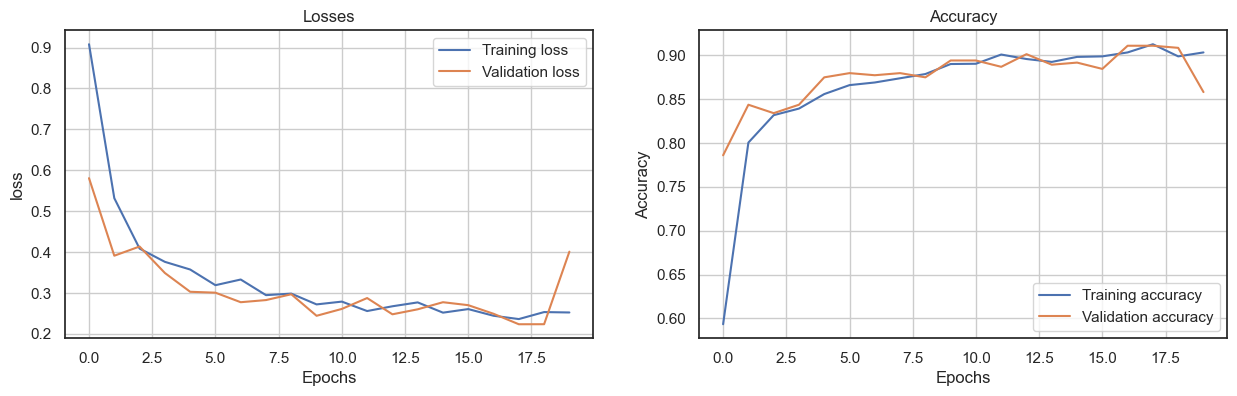

In [37]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

In [21]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 31s 586ms/step - loss: 0.7629 - accuracy: 0.7478


In [23]:


# After training, make predictions on the validation dataset
predictions = model.predict(test_ds)

# Get the actual class labels from the validation dataset
actual_labels = []
for x, y in test_ds:
    actual_labels.extend(y.numpy())

# Convert the predicted probabilities to class labels
predicted_labels = [np.argmax(p) for p in predictions]

# Calculate accuracy per class
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(actual_labels, predicted_labels)
report = classification_report(actual_labels, predicted_labels, target_names=["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"])

print("Overall Accuracy:", accuracy)
print("Accuracy per Class:")
print(report)


14/14 [==============================] - 31s 855ms/step
Overall Accuracy: 0.35267857142857145
Accuracy per Class:
                precision    recall  f1-score   support

        Blight       0.34      0.37      0.35       117
   Common_Rust       0.40      0.38      0.39       142
Gray_Leaf_Spot       0.19      0.24      0.21        51
       Healthy       0.40      0.36      0.38       138

      accuracy                           0.35       448
     macro avg       0.33      0.33      0.33       448
  weighted avg       0.36      0.35      0.36       448



In [36]:
from sklearn.metrics import accuracy_score

# After training, make predictions on the test dataset
predictions = model.predict(test_ds)

# Get the actual class labels from the test dataset
actual_labels = []
for x, y in test_ds:
    actual_labels.extend(y.numpy())

# Convert the predicted probabilities to class labels
predicted_labels = [np.argmax(p) for p in predictions]

# Calculate accuracy per class
num_classes = 4  # Replace with the actual number of classes
accuracy_per_class = []

for class_idx in range(num_classes):
    class_indices = [i for i, label in enumerate(actual_labels) if label == class_idx]
    class_true_labels = [actual_labels[i] for i in class_indices]
    class_predicted_labels = [predicted_labels[i] for i in class_indices]
    class_accuracy = accuracy_score(class_true_labels, class_predicted_labels)
    accuracy_per_class.append(class_accuracy)

# Print accuracy per class
class_names = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]
for class_name, accuracy in zip(class_names, accuracy_per_class):
    print(f"Accuracy for class '{class_name}': {accuracy:.2%}")


14/14 [==============================] - 9s 505ms/step
Accuracy for class 'Blight': 30.77%
Accuracy for class 'Common_Rust': 28.17%
Accuracy for class 'Gray_Leaf_Spot': 13.73%
Accuracy for class 'Healthy': 28.99%


In [37]:
# Assuming you have already created your train_ds, val_ds, and test_ds datasets
model.predict(test_ds)

14/14 [==============================] - 16s 806ms/step


array([[3.6485247e-02, 1.4496148e-02, 1.7441735e-02, 9.3157691e-01],
       [4.8400279e-02, 2.0144457e-02, 2.4182733e-02, 9.0727252e-01],
       [5.4261584e-02, 1.9884869e-02, 2.5847297e-02, 9.0000623e-01],
       ...,
       [2.6093889e-02, 9.5059993e-03, 1.1544581e-02, 9.5285547e-01],
       [3.6293700e-02, 1.4679147e-02, 1.8299706e-02, 9.3072742e-01],
       [5.3106976e-01, 1.7009245e-01, 2.9883716e-01, 6.2465472e-07]],
      dtype=float32)

First Image to Predict :

Actual label: Blight
1/1 [==============================] - 3s 3s/step

Predicted label Blight


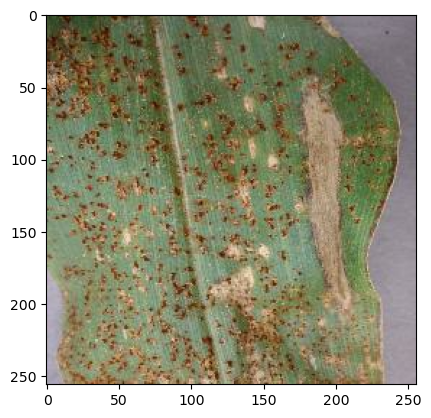

In [66]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch) 
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])